## Geting Zoning Data

In [1]:
import requests
import pandas as pd
from pandas import json_normalize

base_url = "https://phl.carto.com/api/v2/sql"
query = """
SELECT * FROM permits
"""

params = {
    "q":query
}

results = requests.get(base_url, params)

data = results.json()

permits = pd.DataFrame(data['rows'])

permits.head()


,cartodb_id,the_geom,the_geom_webmercator,objectid,permitnumber,addressobjectid,parcel_id_num,permittype,permitdescription,commercialorresidential,...,council_district,opa_owner,systemofrecord,geocode_x,geocode_y,posse_jobid,usecategories,occupancytype,numberofunits,permitcompleteddate
0,1,0101000020E6100000EC3D2B517ACE52C0D458E15D93F9...,0101000020110F0000AB493F01E0F15FC18EDFDEDCC688...,1,RP-2023-002889,135469345,202124,Residential Building,Residential Building Permit,Residential,...,3,"SCRIVEN LULA, ASKEW VALERIE",ECLIPSE,2.675990e+06,234684.199941,581357705,None,R-3 Residential (1 or 2 Dwellings),NaN,2023-10-17T19:18:21Z
1,2,0101000020E6100000F1E47EE427CC52C0BD035A66D7F9...,0101000020110F0000BF18A650EEED5FC1DDAB543C1289...,2,CP-2023-004439,217051318,287264,Building,Commercial Building Permit,Commercial,...,3,TRUSTEES OF THE UNIVERSIT,ECLIPSE,2.686136e+06,235732.952015,630649857,None,B Business (Office),1.0,2025-01-09T12:22:31Z
2,3,0101000020E6100000EC92DAC368CF52C08E47A3AF5BFC...,0101000020110F00005CE0630875F35FC15E230B25DC8B...,3,MP-2023-002200,388366932,193173,Mechanical,Mechanical / Fuel Gas Permit,Residential,...,4,"BOBB LORETTA, BOBB NIGEL",ECLIPSE,2.671687e+06,242483.605482,600447114,None,None,NaN,2024-01-30T20:20:15Z
3,4,0101000020E6100000D59D5D156EC952C0A53620409BF7...,0101000020110F00005D3E1C044DE95FC189FF4C6E9886...,4,MP-2020-006587,131005776,239027,Mechanical,Mechanical / Fuel Gas Permit,Residential,...,1,"SAPONARO ANGELA, SAPONARO CYNTHIA",ECLIPSE,2.698259e+06,229724.108337,299194128,None,None,NaN,2021-06-10T19:17:38Z
4,5,0101000020E6100000FEF02E38AFCA52C03569AE197CF7...,0101000020110F0000AAF7747F6EEB5FC1BD83B5ED7586...,5,EP-2023-008090,436632802,1473350,Electrical,Electrical Permit,Residential,...,1,"IYER ARUN, IYER LAURA",ECLIPSE,2.692775e+06,229216.600581,635930057,None,None,NaN,None


In [18]:
pd.to_datetime(permits['permitcompleteddate'])

0        2023-10-17 19:18:21+00:00
1        2025-01-09 12:22:31+00:00
2        2024-01-30 20:20:15+00:00
3        2021-06-10 19:17:38+00:00
4        2024-12-26 20:14:50+00:00
                    ...           
856354   2020-01-13 15:05:25+00:00
856355   2016-01-28 01:34:07+00:00
856356   2013-08-26 16:45:26+00:00
856357   2018-09-24 15:14:47+00:00
856358   2013-06-11 14:57:30+00:00
Name: permitcompleteddate, Length: 856359, dtype: datetime64[ns, UTC]

In [19]:
permits['permittype'].value_counts()

permittype
PP_PLUMBNG               149971
EP_ELECTRL               104548
BP_ALTER                 100286
Plumbing                  74325
Electrical                52250
BP_MECH                   46074
ZP_ZON/USE                34462
ZP_USE                    28681
Residential Building      28599
Zoning                    27985
Mechanical                25328
BP_FIRESUP                23928
ZP_ZONING                 23109
BP_ADMINST                20770
General Permit Minor      20111
Building                  15883
BP_NEWCNST                14445
Fire Suppression          14062
BP_DEMO                   13714
OPS PERMIT                 7181
BP_ADDITON                 6532
BP_SIGN                    4441
L_FFORM                    4376
General                    3546
Demolition                 3460
Administrative             2973
ZP_ADMIN                   2185
Operations                 1491
Site / Utility Permit      1470
Preliminary Approval        117
Master Plan                  

In [2]:
import geopandas as gpd
rco = gpd.read_file('https://opendata.arcgis.com/datasets/efbff0359c3e43f190e8c35ce9fa71d6_0.geojson')

In [8]:
rco.head()

,OBJECTID,ORGANIZATION_NAME,ORGANIZATION_ADDRESS,MEETING_LOCATION_ADDRESS,ORG_TYPE,PREFFERED_CONTACT_METHOD,PRIMARY_NAME,PRIMARY_ADDRESS,PRIMARY_EMAIL,PRIMARY_PHONE,...,ALTERNATE_ADDRESS,ALTERNATE_EMAIL,ALTERNATE_PHONE,A_PHONE_EXT,EXPIRATIONYEAR,EFFECTIVE_DATE,LNI_ID,Shape__Area,Shape__Length,geometry
0,1,Girard Estate Neighbors Association,"PO Box 20116\r\nPhiladelphia, pA 19145","Donatucci Library\r\n1935 W Shunk St., Philade...",Other,Email,Jessica Frye,"2527 South Cleveland Street\r\nPhiladelphia, P...",jlynnfrye@gmail.com,2158706166,...,"2527 South Cleveland Street\r\nPhiladelphia, P...",flowershow1997@yahoo.com,2674089341,NaN,2025,2014-03-01 00:00:00+00:00,203,1.082550e+06,4463.667453,"POLYGON ((-75.18689 39.91886, -75.18757 39.919..."
1,2,SoLo/Germantown Civic Association,"4908 Wayne Ave Philadelhia, PA 19144",5058 Wayne Ave (in person suspended) Phila PA ...,Other,Email,Allison Weiss,"4908 Wayne Ave Philadelphia, PA 19144",awfromhh6@gmail.com,2158435555,...,"4941 Royal St Philadelphia, PA 19144",\t\tthekeithbrooks@hotmail.com,2022711494,NaN,2025,2014-03-01 00:00:00+00:00,321,5.993613e+06,11871.164642,"POLYGON ((-75.16022 40.0213, -75.16059 40.0204..."
2,3,East Passyunk Crossing Civic Association (EPX),"1025 Mifflin St Philadelphia, PA 19148","1025 Mifflin St Philadelphia, PA 19148",Other,Email,Bruce Benjamin,"1430 Walnut Street 3rd Floor Philadelphia, PA...",Zoning@epcrossing.org,2158050172,...,"1120 Morris Street Philadelphia, PA 19148",ajsciolla@yahoo.com,2158808514,NaN,2025,2014-03-01 00:00:00+00:00,174,1.318087e+06,4734.886361,"POLYGON ((-75.16626 39.93022, -75.16559 39.930..."
3,4,Residents of Shawmont Valley Association,18 Shawmont Ave,"8230 Ridge Avenue Philadelphia, PA 19128",Other,Email,Aaron Couch,"399 Port Royal Ave.\r\nPhiladelphia, PA 19128",shawmontvalley@gmail.com,None,...,"21 River Road \r\nPhiladelphia, Pennsylvania 1...",robertsmall1@comcast.net,2154367594,NaN,2025,2014-03-01 00:00:00+00:00,311,4.730749e+06,9316.543271,"POLYGON ((-75.25151 40.06573, -75.2416 40.0576..."
4,5,Passyunk Square Civic Association,"PO Box 18052 Philadelphia, PA 19147",General Membership Meetings: South Philadelphi...,Other,Email,David Goldfarb,1168 S 13th St,dbgoldfarb@gmail.com,2155863975,...,"939 Federal Street\r\nPhiladelphia, PA 19147",suzanne.tavani@gmail.com,2159018132,NaN,2025,2014-03-01 00:00:00+00:00,289,1.537982e+06,4984.320226,"POLYGON ((-75.16671 39.93785, -75.16661 39.937..."


In [6]:
permits = gpd.GeoDataFrame(permits,  geometry=gpd.GeoSeries.from_wkb(permits["the_geom"]), crs=4326)
permits_rco = gpd.sjoin(permits, rco, how='left', predicate='intersects')
permits_rco.head()

,cartodb_id,the_geom,the_geom_webmercator,objectid,permitnumber,addressobjectid,parcel_id_num,permittype,permitdescription,commercialorresidential,...,ALTERNATE_NAME,ALTERNATE_ADDRESS,ALTERNATE_EMAIL,ALTERNATE_PHONE,A_PHONE_EXT,EXPIRATIONYEAR,EFFECTIVE_DATE,LNI_ID,Shape__Area,Shape__Length
0,1,0101000020E6100000EC3D2B517ACE52C0D458E15D93F9...,0101000020110F0000AB493F01E0F15FC18EDFDEDCC688...,1,RP-2023-002889,135469345,202124,Residential Building,Residential Building Permit,Residential,...,Kevin Horne,"1218 South 49th Street, Philadelphia Pa 19143",swpds@aol.com,2675863599,NaN,2025.0,2014-07-26 00:00:00+00:00,338.0,1.451699e+07,23046.363306
0,1,0101000020E6100000EC3D2B517ACE52C0D458E15D93F9...,0101000020110F0000AB493F01E0F15FC18EDFDEDCC688...,1,RP-2023-002889,135469345,202124,Residential Building,Residential Building Permit,Residential,...,Amara Rockar,C/O Cedar Park Neighbors ...,contact@cedarparkneighbors.org,2672258283,NaN,2025.0,2014-03-01 00:00:00+00:00,135.0,1.440637e+06,4927.807609
0,1,0101000020E6100000EC3D2B517ACE52C0D458E15D93F9...,0101000020110F0000AB493F01E0F15FC18EDFDEDCC688...,1,RP-2023-002889,135469345,202124,Residential Building,Residential Building Permit,Residential,...,Yvonne Sawyer,"833 S. 58th Street\r\nPhiladelphia, PA 19143",46wardrco@gmail.com,2154723028,NaN,2025.0,2021-07-01 00:00:00+00:00,64.0,2.972798e+06,10004.396035
0,1,0101000020E6100000EC3D2B517ACE52C0D458E15D93F9...,0101000020110F0000AB493F01E0F15FC18EDFDEDCC688...,1,RP-2023-002889,135469345,202124,Residential Building,Residential Building Permit,Residential,...,Matthew Wolfe,"4256 Regent Square, Philadelphia PA 19104",matthew@wolfe.org,2153877300,NaN,2025.0,2014-07-19 00:00:00+00:00,63.0,2.972798e+06,10004.396035
0,1,0101000020E6100000EC3D2B517ACE52C0D458E15D93F9...,0101000020110F0000AB493F01E0F15FC18EDFDEDCC688...,1,RP-2023-002889,135469345,202124,Residential Building,Residential Building Permit,Residential,...,Frank Allegra,4603 Cedar Avenue\r\n\r\nUnited States,utestprep@comcast.net,2155199350,NaN,2025.0,2014-04-05 00:00:00+00:00,198.0,1.362085e+06,4868.066189


In [27]:
permits_rco['permittype'].value_counts()

permittype
PP_PLUMBNG               422429
EP_ELECTRL               292449
BP_ALTER                 275312
Plumbing                 213065
Electrical               147961
BP_MECH                  131450
ZP_ZON/USE                99655
Residential Building      83960
ZP_USE                    82780
Zoning                    81081
Mechanical                75100
BP_FIRESUP                66009
ZP_ZONING                 62535
General Permit Minor      57716
BP_ADMINST                54565
Building                  45182
BP_NEWCNST                43465
Fire Suppression          40823
BP_DEMO                   40068
BP_ADDITON                17105
OPS PERMIT                16437
L_FFORM                   11752
Demolition                11330
BP_SIGN                   10796
General                    8927
Administrative             8510
ZP_ADMIN                   6218
Site / Utility Permit      4265
Operations                 3576
Preliminary Approval        290
Master Plan                 1

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt

#zoning permits
zoning = permits_rco[
    (permits_rco['permittype'].isin(['ZP_ZON/USE', 'ZP_USE', 'ZP_ZONING']))].groupby('ORGANIZATION_NAME').size().reset_index(name='permit_count')

zoning = rco.merge(zoning, on='ORGANIZATION_NAME', how='left')
zoning['permit_count'] = zoning['permit_count'].fillna(0)

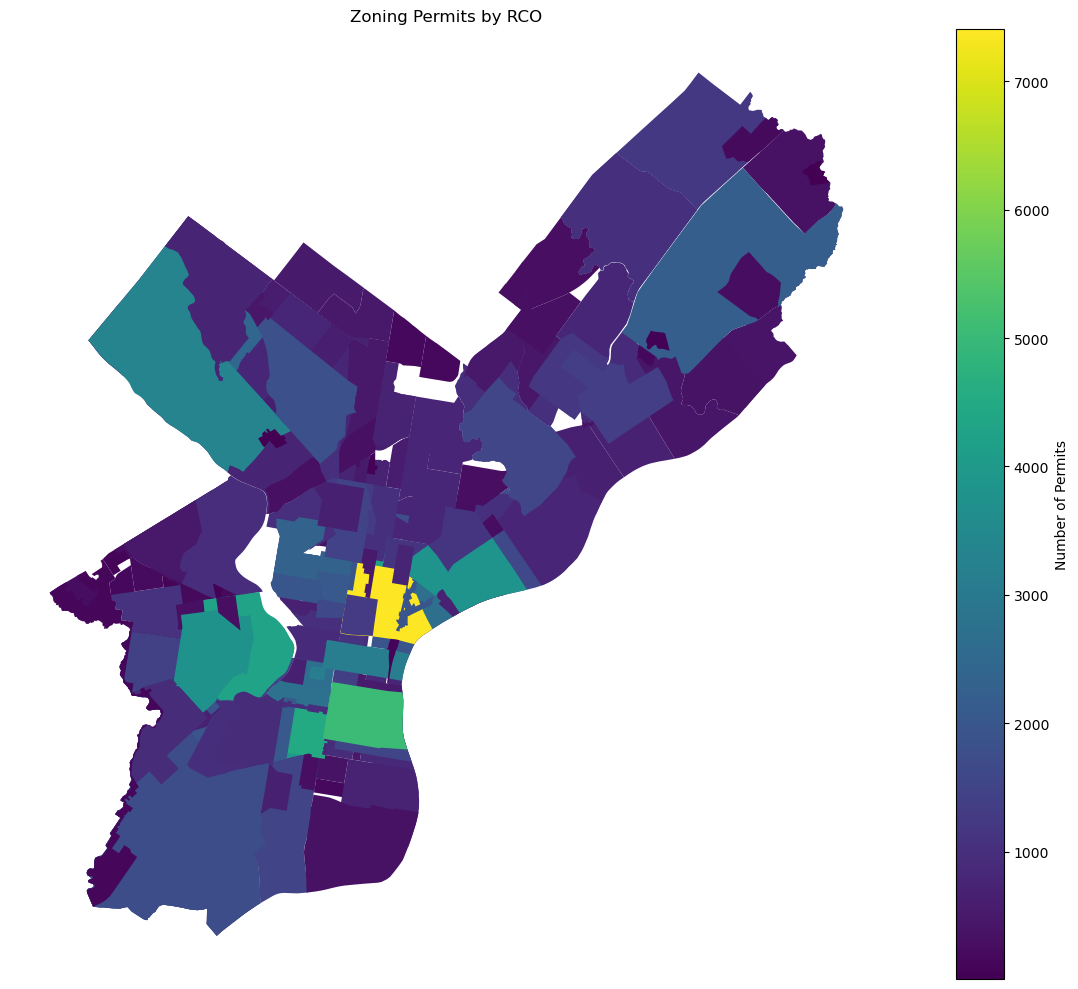

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
zoning.plot(column='permit_count', 
                     legend=True,
                     legend_kwds={'label': 'Number of Permits'},
                     cmap='viridis',
                     ax=ax)

# Customize plot
ax.set_title('Zoning Permits by RCO')
ax.axis('off')

plt.tight_layout()
plt.show()